<a href="https://colab.research.google.com/github/pooriaazami/deep_learning_class_notebooks/blob/main/Deep_Learning's_Hello_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = np.array([[1.], [2.], [3.], [4.]])
Y = 2 * X + 1

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1, name='linear_regression_layer')
], name='regressor')

In [ ]:
model.compile(
    loss='mse',
    optimizer='sgd'
)

In [ ]:
model.fit(X, Y, epochs=500, batch_size=1)

Epoch 1/500
4/4 [==============================] - 0s 6ms/step - loss: 21.8658
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 4.5434
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 1.0188
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2281
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0668
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0307
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0231
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0213
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0211
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0205
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0201
Epoch 13/500
4/4 [==============================] - 0s 3ms/s

In [ ]:
model.layers[0].weights[0].numpy()[0, 0]

2.0002308

In [ ]:
model.layers[0].weights[1].numpy()[0]

0.9992903

$$ y = \theta_1 x + \theta_0 $$

$$ y = 2.0002308 x + 0.9992903 $$
$$ y =  2 x + 1 $$

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

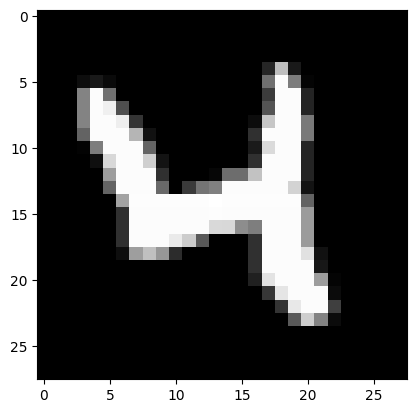

In [4]:
idx = 20
plt.imshow(x_train[idx], cmap='gray')
plt.show()

In [5]:
x_train_flattened = x_train.reshape(-1, 28 * 28)
x_test_flattened = x_test.reshape(-1, 28 * 28)

In [6]:
x_train_flattened.shape

(60000, 784)

In [7]:
x_train_flattened = x_train_flattened / 255.
x_test_flattened = x_test_flattened / 255.

In [8]:
model = keras.Sequential([
    keras.Input(28 * 28, name='input_layer'),
    keras.layers.Dense(128, activation='relu', name='fc_1'),
    keras.layers.Dense(128, activation='relu', name='fc_2'),
    keras.layers.Dense(10, activation='softmax', name='output_layer')
], name='mnist_classifier')

In [9]:
model.summary()

Model: "mnist_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc_1 (Dense)                (None, 128)               100480    
                                                                 
 fc_2 (Dense)                (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [11]:
history = model.fit(x_train_flattened,
          y_train,
          validation_data=(x_test_flattened, y_test),
          epochs=10,
          batch_size=32,
          # callbacks=[
          #     keras.callbacks.EarlyStopping(patience=5)
          # ]
)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6276 - accuracy: 0.8352 - val_loss: 0.3227 - val_accuracy: 0.9089
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3014 - accuracy: 0.9136 - val_loss: 0.2632 - val_accuracy: 0.9232
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2516 - accuracy: 0.9276 - val_loss: 0.2241 - val_accuracy: 0.9349
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2175 - accuracy: 0.9377 - val_loss: 0.1984 - val_accuracy: 0.9413
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1915 - accuracy: 0.9443 - val_loss: 0.1784 - val_accuracy: 0.9478
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1707 - accuracy: 0.9512 - val_loss: 0.1622 - val_accuracy: 0.9507
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1538 - accuracy: 0.9553 - val_loss: 0.1488 - val_accuracy

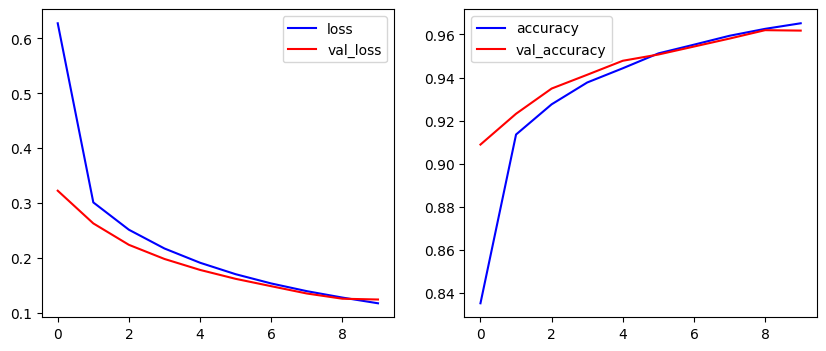

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history.history['loss'], label='loss', color='blue')
axs[0].plot(history.history['val_loss'], label='val_loss', color='red')
axs[0].legend()

axs[1].plot(history.history['accuracy'], label='accuracy', color='blue')
axs[1].plot(history.history['val_accuracy'], label='val_accuracy', color='red')
axs[1].legend()

plt.show()

In [ ]:
preds = model.predict(x_train_flattened)

1875/1875 [==============================] - 3s 2ms/step
